# **PUC MINAS**

---



# **TCC - PÓS GRADUAÇÃO EM CIÊNCIA DE DADOS E BIG DATA**

---



# **PREDIÇÃO DE APROVAÇÃO DO FIES COM NOTAS DO ENEM E IDHM**

---



# **LUCAS SEVERIANO VIEIRA**

#Bibliotecas/Constantes

In [318]:
# Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# ML

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [319]:
# Função para montagem gráficos

def plot_chart(desired_variable, df, order, title=None, xlabel=None, ylabel=None,
               hue=None, ax=None):
    sns.countplot(y=desired_variable,
                  hue=hue,
                  data=df,
                  palette='rocket',
                  order=order,
                  ax=ax).set_title(title)
    plt.xlabel(xlabel=xlabel)
    plt.ylabel(ylabel=ylabel)
    plt.grid(axis='x', linestyle='--')
    plt.minorticks_on()

In [320]:
# Função para retirar acentos

def corrigir_nomes(nome):
    nome = nome.replace('¿', "'").replace('Ç', 'C').replace('Ã', 'A').replace('Õ', 'O').replace('Â', 'A').replace('Ê', 'E').replace('Ô', 'O').replace('Á', 'A').replace('É', 'E').replace('Í', 'I').replace('Ó', 'O').replace('Ú', 'U')
    return nome

#Carga e tratamento dos dados

In [321]:
# Carga dos dados - FIES

df_fies = pd.read_csv('relatorio_inscricao_dados_abertos_fies_22021.csv', encoding="ISO-8859-1", sep = ';')
df_fies.shape

(237965, 57)

In [322]:
# Carga dos dados - Cidades

df_cidades = pd.read_excel('Cities_Brazil_IBGE.xlsx')
df_cidades.shape

(5570, 14)

In [323]:
# Leitura dos dados - FIES

df_fies.head()

,Ano do processo seletivo,Semestre do processo seletivo,ID do estudante,Sexo,Data de Nascimento,UF de residência,Municipio de residência,Etnia/Cor,Pessoa com deficiência?,Tipo de escola no ensino médio,...,Ano do Enem,Redação,Matemática e suas Tecnologias,"Linguagens, Códigos e suas Tec",Ciências Natureza e suas Tec,Ciências Humanas e suas Tec,Situação Inscrição Fies,Percentual de financiamento,Semestre do financiamento,Qtde semestre financiado
0,2021,2,281805657,M,15/05/00,PR,COLOMBO,PARDA,NÃO,SIM,...,2020,640,"675,4","643,2","539,7","622,2",NÃO CONTRATADO,NaN,,NaN
1,2021,2,281805657,M,15/05/00,PR,COLOMBO,PARDA,NÃO,SIM,...,2020,640,"675,4","643,2","539,7","622,2",NÃO CONTRATADO,NaN,,NaN
2,2021,2,351067941,M,10/07/94,PR,CURITIBA,BRANCA,NÃO,NÃO,...,2011,900,"758,1","646,9","598,4","605,7",PARTICIPACAO CANCELADA PELO CANDIDATO,NaN,,NaN
3,2021,2,205906170,M,25/09/89,PR,CURITIBA,BRANCA,NÃO,SIM,...,2020,540,"609,8","610,7",586,"646,2",OPÇÃO NÃO CONTRATADA,NaN,NaN,10.0
4,2021,2,351067085,F,20/07/99,PR,PARANAGUÁ,BRANCA,NÃO,SIM,...,2017,680,"408,6","499,8","484,5","487,9",NÃO CONTRATADO,NaN,,NaN


In [324]:
# Leitura dos dados - Cidades

df_cidades.head()

,IBGECode,LocalCidade,LocalUF,LocalEstado,RegiaoBrasil,Latitude,Longitude,Gentilico,PopEstimada_2018,PopCenso 2010,IDHM,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014
0,1100015,ALTA FLORESTA D'OESTE,RO,Rondonia,N,-119283,-619953,alta-florense,23167,24392,"0,641",53490,47577,"16461,11"
1,1100023,ARIQUEMES,RO,Rondonia,N,-990571,-630325,ariquemense,106168,90353,"0,702",0,0,"19401,43"
2,1100031,CABIXI,RO,Rondonia,N,-134945,-60552,cabixiense,5438,6313,"0,65",22635,19354,"18346,17"
3,1100049,CACOAL,RO,Rondonia,N,-114343,-614562,cacoalense,84813,78574,"0,718",169636,155473,"20725,23"
4,1100056,CEREJEIRAS,RO,Rondonia,N,-13187,-608168,cerejeirense,16444,17029,"0,692",53147,46774,"22179,17"


In [325]:
# Ajuste cidades da base do FIES

df_fies['Municipio de residência'] = df_fies['Municipio de residência'].apply(corrigir_nomes)

df_fies.replace(to_replace = "EMBU", value = "EMBU DAS ARTES", inplace=True)
df_fies.replace(to_replace = "MOJI MIRIM", value = "MOGI MIRIM", inplace=True)
df_fies.replace(to_replace = "JI-PARANA", value = "JI PARANA", inplace=True)
df_fies.replace(to_replace = "SANTA BARBARA D'OESTE", value = "SANTA BARBARA D OESTE", inplace=True)
df_fies.replace(to_replace = "LIVRAMENTO DE NOSSA SENHORA", value = "LIVRAMENTO DO BRUMADO", inplace=True)
df_fies.replace(to_replace = "GUAJARA-MIRIM", value = "GUAJARA MIRIM", inplace=True)
df_fies.replace(to_replace = "IGARAPE-MIRI", value = "IGARAPE-MIRIM", inplace=True)
df_fies.replace(to_replace = "NOVA BRASILANDIA D'OESTE", value = "NOVA BRASILANDIA D OESTE", inplace=True)
df_fies.replace(to_replace = "ESPIGAO D'OESTE", value = "ESPIGAO D OESTE", inplace=True)
df_fies.replace(to_replace = "PINGO-D'AGUA", value = "PINGO D'AGUA", inplace=True)
df_fies.replace(to_replace = "COLORADO DO OESTE", value = "COLORADO D OESTE", inplace=True)
df_fies.replace(to_replace = "ITABIRINHA", value = "ITABIRINHA DE MANTENA", inplace=True)
df_fies.replace(to_replace = "PEROLA D'OESTE", value = "PEROLA D OESTE", inplace=True)
df_fies.replace(to_replace = "SAO MIGUEL DO GOSTOSO", value = "SAO MIGUEL DE TOUROS", inplace=True)
df_fies.replace(to_replace = "BALNEARIO PICARRAS", value = "PICARRAS", inplace=True)
df_fies.replace(to_replace = "SAO JORGE D'OESTE", value = "SAO JORGE D OESTE", inplace=True)
df_fies.replace(to_replace = "PRESIDENTE CASTELLO BRANCO", value = "PRESIDENTE CASTELO BRANCO", inplace=True)
df_fies.replace(to_replace = "CAMPO DE SANTANA", value = "TACIMA", inplace=True)

In [326]:
# Merge dos Datasets

df_dados = pd.merge(df_fies, df_cidades,  how='left', left_on=['Municipio de residência','UF de residência'], right_on = ['LocalCidade','LocalUF'])
df_dados.shape

(237965, 71)

In [327]:
# Leitura dos dados - Dados agrupados

df_dados.head()

,Ano do processo seletivo,Semestre do processo seletivo,ID do estudante,Sexo,Data de Nascimento,UF de residência,Municipio de residência,Etnia/Cor,Pessoa com deficiência?,Tipo de escola no ensino médio,...,RegiaoBrasil,Latitude,Longitude,Gentilico,PopEstimada_2018,PopCenso 2010,IDHM,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014
0,2021,2,281805657,M,15/05/00,PR,COLOMBO,PARDA,NÃO,SIM,...,SUL,-252925,-492262,colombense,240840.0,212967.0,"0,733",318326.0,287335.0,"18896,33"
1,2021,2,281805657,M,15/05/00,PR,COLOMBO,PARDA,NÃO,SIM,...,SUL,-252925,-492262,colombense,240840.0,212967.0,"0,733",318326.0,287335.0,"18896,33"
2,2021,2,351067941,M,10/07/94,PR,CURITIBA,BRANCA,NÃO,NÃO,...,SUL,-254195,-492646,curitibano,1917185.0,1751907.0,"0,823",6962143.0,6422553.0,"44624,32"
3,2021,2,205906170,M,25/09/89,PR,CURITIBA,BRANCA,NÃO,SIM,...,SUL,-254195,-492646,curitibano,1917185.0,1751907.0,"0,823",6962143.0,6422553.0,"44624,32"
4,2021,2,351067085,F,20/07/99,PR,PARANAGUA,BRANCA,NÃO,SIM,...,SUL,-255161,-485225,parnanguara,153666.0,140469.0,"0,75",355256.0,273408.0,"46973,94"


In [328]:
# Informações sobre tipo dos dados

df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237965 entries, 0 to 237964
Data columns (total 71 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Ano do processo seletivo        237965 non-null  int64  
 1   Semestre do processo seletivo   237965 non-null  int64  
 2   ID do estudante                 237965 non-null  int64  
 3   Sexo                            237965 non-null  object 
 4   Data de Nascimento              237965 non-null  object 
 5   UF de residência                237965 non-null  object 
 6   Municipio de residência         237965 non-null  object 
 7   Etnia/Cor                       237965 non-null  object 
 8   Pessoa com deficiência?         237965 non-null  object 
 9   Tipo de escola no ensino médio  237965 non-null  object 
 10  Ano conclusão ensino médio      237965 non-null  int64  
 11  Concluiu curso superior?        237965 non-null  object 
 12  Professor rede p

In [329]:
# Deleção das colunas não utilizadas

df_dados = df_dados.drop(['Nome mantenedora','Natureza Jurídica Mantenedora','CNPJ da mantenedora','Código e-MEC da Mantenedora','Nome da IES','Código e-MEC da IES','Organização Acadêmica da IES'],axis=1)

df_dados = df_dados.drop(['Município da IES','UF da IES','Nome do Local de oferta','Código do Local de Oferta','Munícipio do Local de Oferta','UF do Local de Oferta','Grau','Conceito'],axis=1)

df_dados = df_dados.drop(['Região grupo de preferência','UF','Cod.Microrregião','Microrregião','Cod.Mesorregião','Mesorregião','Conceito de curso do GP','Subárea do conhecimento','Área do conhecimento'],axis=1)

df_dados = df_dados.drop(['Opções de cursos da inscrição','Código do curso','Percentual de financiamento','Semestre do financiamento','Qtde semestre financiado','IBGECode'],axis=1)

df_dados = df_dados.drop(['RegiaoBrasil','Latitude','Longitude','Gentilico','Ano do processo seletivo','Semestre do processo seletivo','LocalUF','Municipio de residência','Data de Nascimento'],axis=1)

df_dados = df_dados.drop(['Professor rede pública ensino?','Ano do Enem','ReceitasRealizadas_2014','DespesasEmpenhadas_2014','PopEstimada_2018','PopCenso 2010'],axis=1)

df_dados = df_dados.drop(['Tipo de escola no ensino médio','UF de residência','Cod. do Grupo de preferência','Ano conclusão ensino médio','ID do estudante','Pib_2014'],axis=1)

df_dados = df_dados.drop(['Renda familiar mensal bruta', 'Pessoa com deficiência?', 'Concluiu curso superior?','Nº de membros Grupo Familiar'],axis=1)

In [330]:
# Informações sobre tipo dos dados

df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237965 entries, 0 to 237964
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Sexo                            237965 non-null  object
 1   Etnia/Cor                       237965 non-null  object
 2   Renda mensal bruta per capita   237965 non-null  object
 3   Nota Corte Grupo Preferência    237965 non-null  object
 4   Nome do curso                   237965 non-null  object
 5   Turno                           237965 non-null  object
 6   Média nota Enem                 237965 non-null  object
 7   Redação                         237965 non-null  int64 
 8   Matemática e suas Tecnologias   237965 non-null  object
 9   Linguagens, Códigos e suas Tec  237965 non-null  object
 10  Ciências Natureza e suas Tec    237965 non-null  object
 11  Ciências Humanas e suas Tec     237965 non-null  object
 12  Situação Inscrição Fies       

In [331]:
# Renomeando colunas

df_dados.rename(columns={'Etnia/Cor': 'Cor',
                         'Renda mensal bruta per capita': 'Renda_per_capita',
                         'Média nota Enem': 'Media_Enem',
                         'Matemática e suas Tecnologias': 'Matematica',
                         'Linguagens, Códigos e suas Tec': 'Linguagens',
                         'Ciências Natureza e suas Tec': 'Ciencias_natureza',
                         'Ciências Humanas e suas Tec': 'Ciencias_humanas',
                         'Nome do curso': 'Curso',
                         'Nota Corte Grupo Preferência': 'Nota_corte',
                         'Situação Inscrição Fies': 'Situacao'}, inplace = True)

In [332]:
# Análise de dados faltantes

df_dados.isnull().sum().sort_values(ascending=False)[:10]

IDHM                17
LocalCidade          5
LocalEstado          5
Sexo                 0
Cor                  0
Renda_per_capita     0
Nota_corte           0
Curso                0
Turno                0
Media_Enem           0
dtype: int64

In [333]:
# Limpeza de dados nulos

df_dados.dropna(subset=["IDHM"], inplace=True)
df_dados.dropna(subset=["LocalEstado"], inplace=True)
df_dados.dropna(subset=["LocalCidade"], inplace=True)

In [334]:
# Conversão númericos

df_dados['Nota_corte'] = df_dados['Nota_corte'].apply(lambda x: x.replace(",",".")).astype(float)
df_dados['Media_Enem'] = df_dados['Media_Enem'].apply(lambda x: x.replace(",",".")).astype(float)
df_dados['Matematica'] = df_dados['Matematica'].apply(lambda x: x.replace(",",".")).astype(float)
df_dados['Linguagens'] = df_dados['Linguagens'].apply(lambda x: x.replace(",",".")).astype(float)
df_dados['Ciencias_natureza'] = df_dados['Ciencias_natureza'].apply(lambda x: x.replace(",",".")).astype(float)
df_dados['Ciencias_humanas'] = df_dados['Ciencias_humanas'].apply(lambda x: x.replace(",",".")).astype(float)
df_dados['IDHM'] = df_dados['IDHM'].apply(lambda x: x.replace(",",".")).astype(float)
df_dados['Renda_per_capita'] = df_dados['Renda_per_capita'].apply(lambda x: x.replace(",",".")).astype(float)

In [335]:
# Conversão categóricos

label_encoder = LabelEncoder()
df_dados['Curso'] = label_encoder.fit_transform(df_dados['Curso'])
df_dados['LocalEstado'] = label_encoder.fit_transform(df_dados['LocalEstado'])
df_dados['LocalCidade'] = label_encoder.fit_transform(df_dados['LocalCidade'])

In [336]:
# Limpeza da coluna alvo, apenas vai ser verificado dados contratados ou não

df_dados.drop(df_dados.loc[df_dados['Situacao']=='INSCRIÇÃO POSTERGADA'].index, inplace=True)
df_dados.drop(df_dados.loc[df_dados['Situacao']=='LISTA DE ESPERA'].index, inplace=True)
df_dados.drop(df_dados.loc[df_dados['Situacao']=='OPÇÃO NÃO CONTRATADA'].index, inplace=True)
df_dados.drop(df_dados.loc[df_dados['Situacao']=='PARTICIPACAO CANCELADA PELO CANDIDATO'].index, inplace=True)
df_dados.drop(df_dados.loc[df_dados['Situacao']=='PRÉ-SELECIONADO'].index, inplace=True)
df_dados.drop(df_dados.loc[df_dados['Situacao']=='REJEITADA PELA CPSA'].index, inplace=True)

# Conversão para númerico
df_dados['Situacao'].replace(['NÃO CONTRATADO', 'CONTRATADA'], [0, 1], inplace=True)

print(df_dados.groupby('Situacao').size())

Situacao
0    115773
1     22442
dtype: int64


In [337]:
# Estrutura dos dados

df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138215 entries, 0 to 237961
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Sexo               138215 non-null  object 
 1   Cor                138215 non-null  object 
 2   Renda_per_capita   138215 non-null  float64
 3   Nota_corte         138215 non-null  float64
 4   Curso              138215 non-null  int64  
 5   Turno              138215 non-null  object 
 6   Media_Enem         138215 non-null  float64
 7   Redação            138215 non-null  int64  
 8   Matematica         138215 non-null  float64
 9   Linguagens         138215 non-null  float64
 10  Ciencias_natureza  138215 non-null  float64
 11  Ciencias_humanas   138215 non-null  float64
 12  Situacao           138215 non-null  int64  
 13  LocalCidade        138215 non-null  int64  
 14  LocalEstado        138215 non-null  int64  
 15  IDHM               138215 non-null  float64
dtypes:

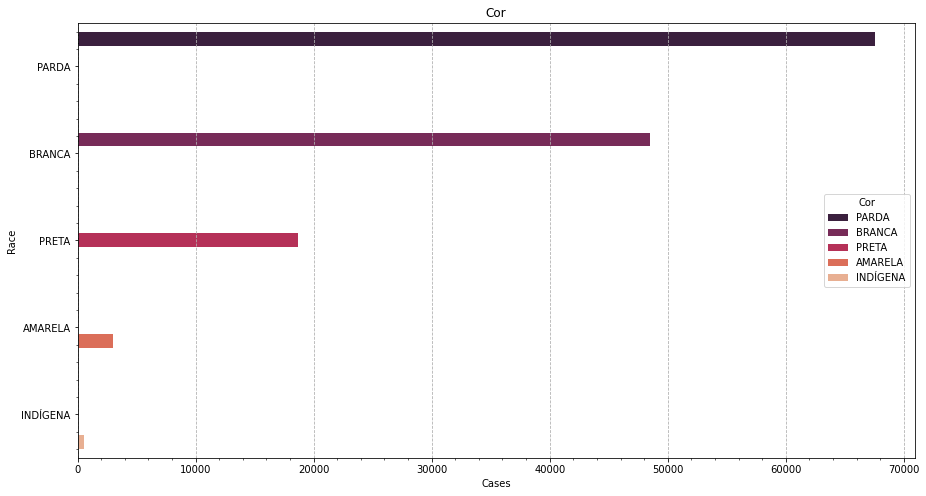

In [338]:
plt.figure(figsize=(15, 8))
plot_chart('Cor', df_dados, df_dados['Cor'].value_counts().index, title='Cor',
           ylabel='Race', xlabel='Cases', hue='Cor')

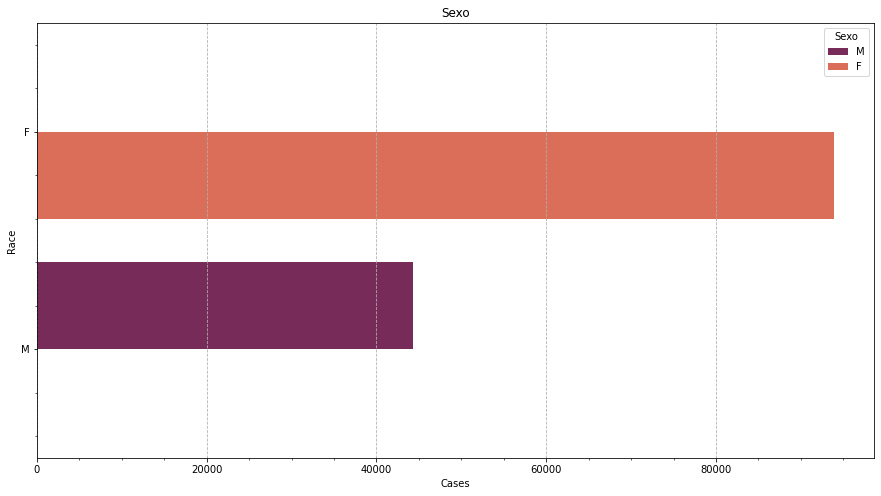

In [339]:
plt.figure(figsize=(15, 8))
plot_chart('Sexo', df_dados, df_dados['Sexo'].value_counts().index, title='Sexo',
           ylabel='Race', xlabel='Cases', hue='Sexo')

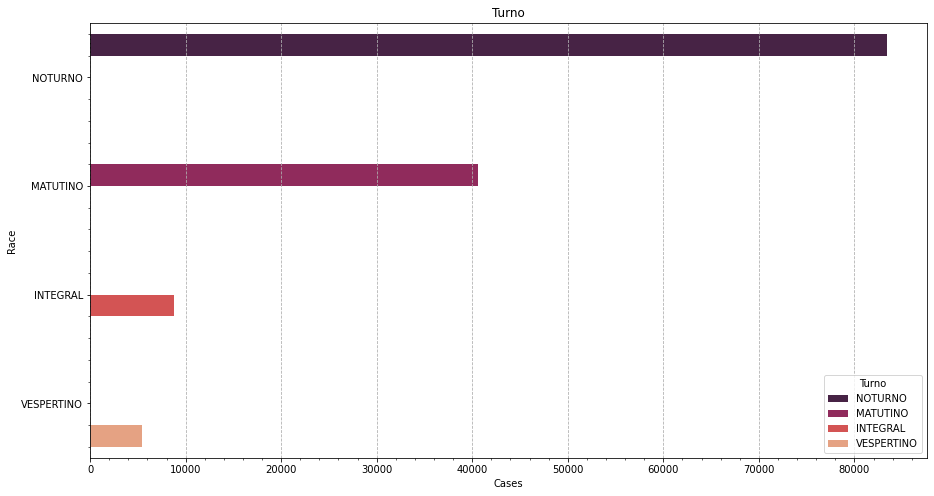

In [340]:
plt.figure(figsize=(15, 8))
plot_chart('Turno', df_dados, df_dados['Turno'].value_counts().index, title='Turno',
           ylabel='Race', xlabel='Cases', hue='Turno')

In [341]:
#Exclusão de colunas não utilizadas no modelo

df_dados = df_dados.drop(['Cor', 'Sexo', 'Turno'],axis=1)

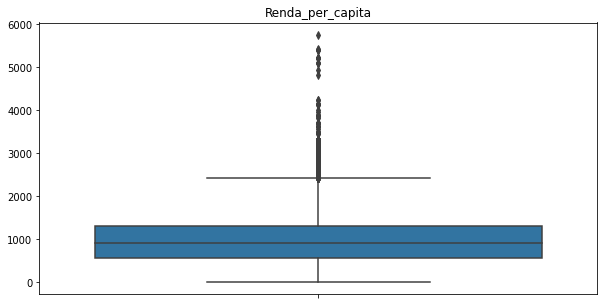

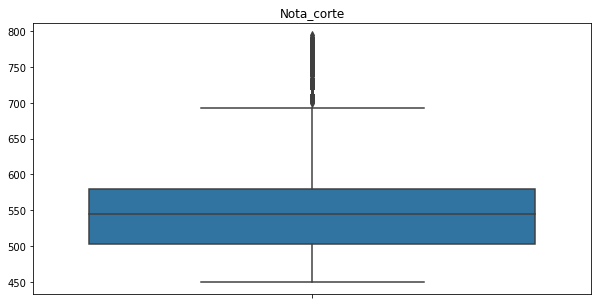

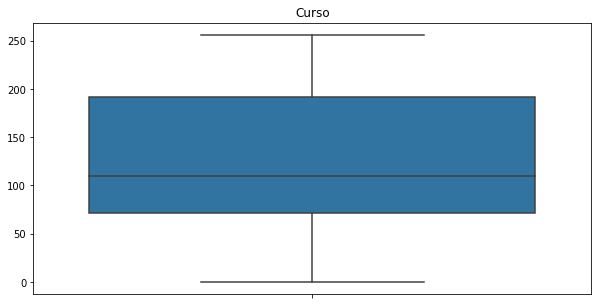

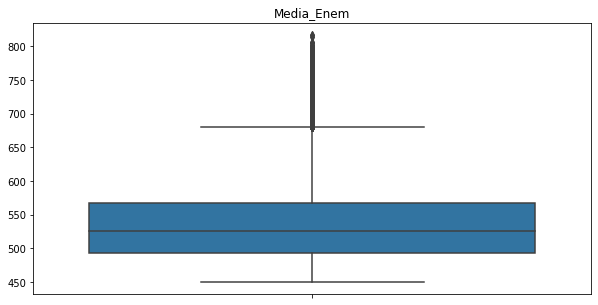

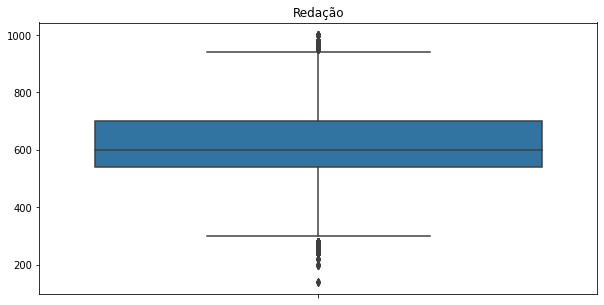

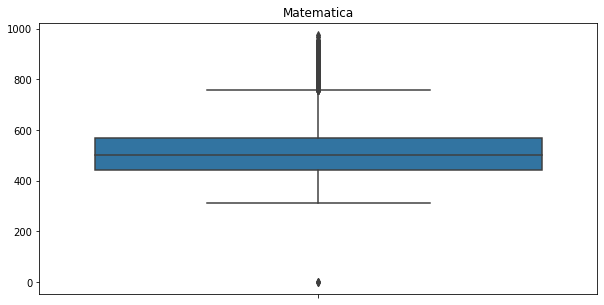

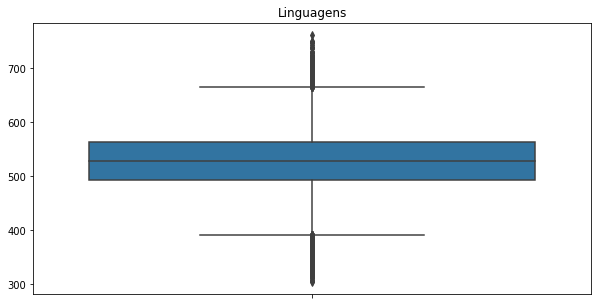

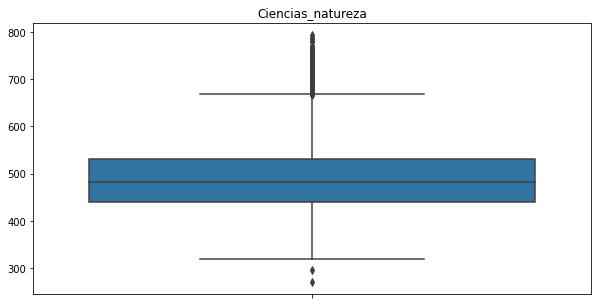

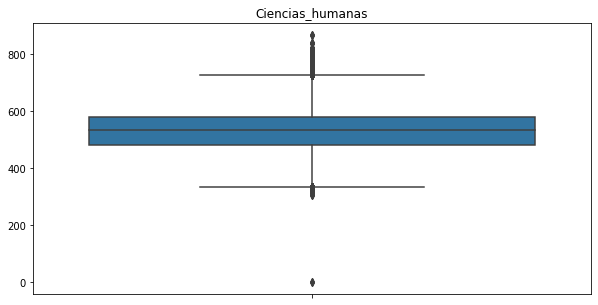

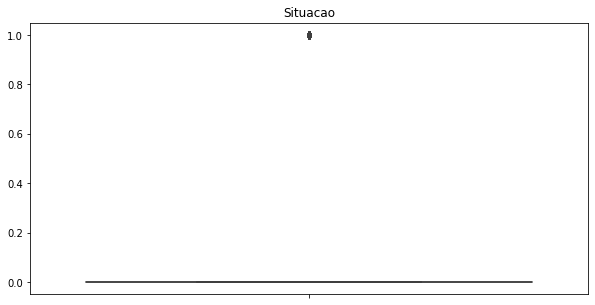

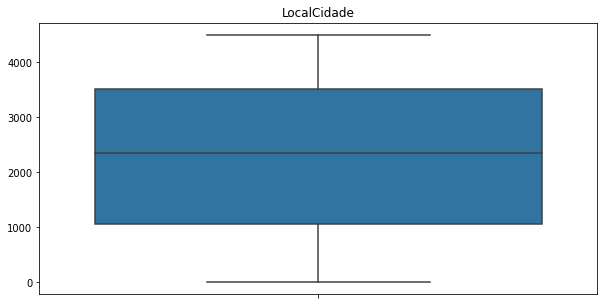

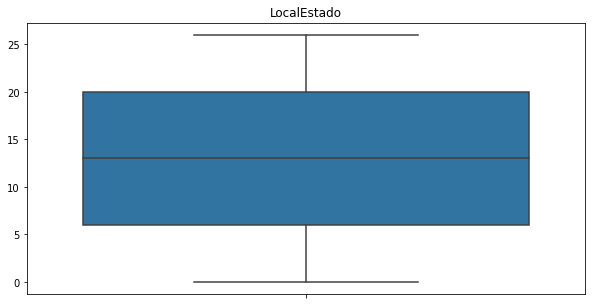

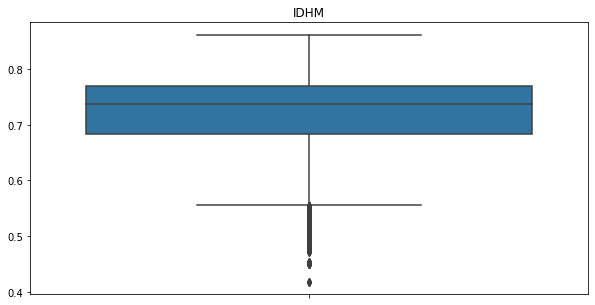

In [342]:
# Análise de Outliers

numeric_columns = df_dados.select_dtypes(np.number).columns

for col in numeric_columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(y=col, data=df_dados)
    plt.title(col)
    plt.ylabel(None)
    plt.show()

In [343]:
# Remoção de outliers e cortes da regra do FIES

df_remove = df_dados.loc[(df_dados['Renda_per_capita'] > 4000) | (df_dados['Media_Enem'] < 450) | (df_dados['Redação'] < 400) ]

df_dados = df_dados.drop(df_remove.index)                             

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc01b876990>]]


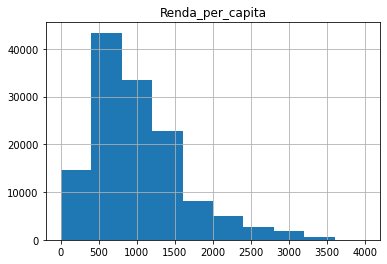

In [344]:
print(df_dados.hist(column = ['Renda_per_capita']))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc016369fd0>]]


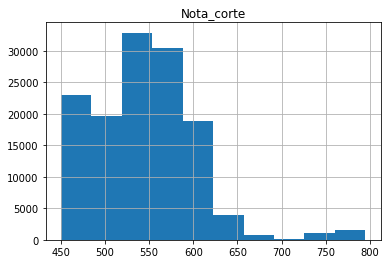

In [345]:
print(df_dados.hist(column = ['Nota_corte']))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc01635fcd0>]]


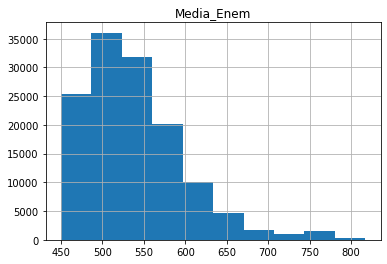

In [346]:
print(df_dados.hist(column = ['Media_Enem']))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0162e4490>]]


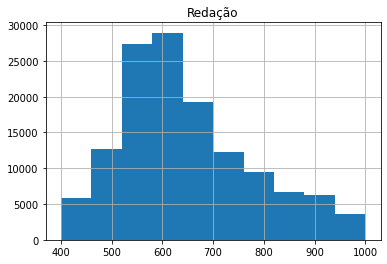

In [347]:
print(df_dados.hist(column = ['Redação']))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc016249090>]]


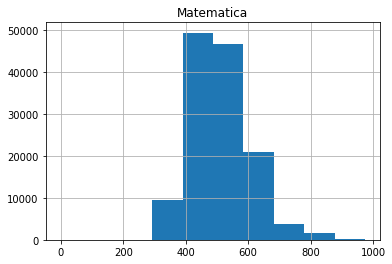

In [348]:
print(df_dados.hist(column = ['Matematica']))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0161bbfd0>]]


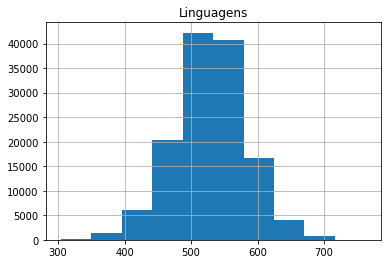

In [349]:
print(df_dados.hist(column = ['Linguagens']))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0161a4e10>]]


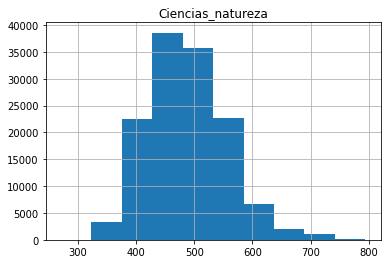

In [350]:
print(df_dados.hist(column = ['Ciencias_natureza']))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc01611e5d0>]]


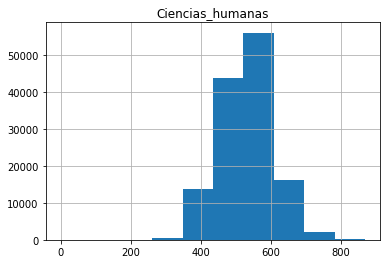

In [351]:
print(df_dados.hist(column = ['Ciencias_humanas']))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc01607dfd0>]]


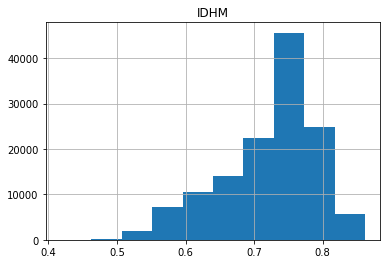

In [352]:
print(df_dados.hist(column = ['IDHM']))

In [353]:
# Normalização dos dados

df_max_scaled = df_dados.copy() 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
      
display(df_max_scaled) 

,Renda_per_capita,Nota_corte,Curso,Media_Enem,Redação,Matematica,Linguagens,Ciencias_natureza,Ciencias_humanas,Situacao,LocalCidade,LocalEstado,IDHM
0,0.354420,0.780957,0.277344,0.763668,0.64,0.692718,0.844094,0.679809,0.716325,0.0,0.236602,0.500000,0.850348
1,0.354420,0.780957,0.277344,0.763668,0.64,0.692718,0.844094,0.679809,0.716325,0.0,0.236602,0.500000,0.850348
4,0.208333,0.780957,0.277344,0.626695,0.68,0.419077,0.655906,0.610278,0.561708,0.0,0.649989,0.500000,0.870070
5,0.208333,0.780957,0.277344,0.626695,0.68,0.419077,0.655906,0.610278,0.561708,0.0,0.649989,0.500000,0.870070
7,0.091667,0.780957,0.277344,0.589056,0.60,0.370667,0.729265,0.620733,0.457172,0.0,0.649989,0.500000,0.870070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237954,0.381250,0.566720,0.093750,0.771695,0.76,0.677231,0.775984,0.682076,0.690997,0.0,0.827218,0.961538,0.933875
237955,0.300000,0.577842,0.347656,0.761906,0.56,0.691795,0.839633,0.732586,0.756850,0.0,0.195686,0.961538,0.868910
237959,0.095833,0.577842,0.347656,0.565856,0.50,0.497333,0.644619,0.494521,0.510592,0.0,0.873916,0.961538,0.933875
237960,0.108332,0.577842,0.347656,0.698204,0.60,0.660000,0.783202,0.630054,0.590030,0.0,0.815877,0.961538,0.945476


In [354]:
#Estatística dos dados

df_dados.describe()

,Renda_per_capita,Nota_corte,Curso,Media_Enem,Redação,Matematica,Linguagens,Ciencias_natureza,Ciencias_humanas,Situacao,LocalCidade,LocalEstado,IDHM
count,132529.000000,132529.000000,132529.000000,132529.000000,132529.000000,132529.000000,132529.000000,132529.000000,132529.000000,132529.000000,132529.000000,132529.000000,132529.000000
mean,1014.299655,544.871342,116.661644,538.934670,636.863720,511.273027,528.092357,487.908448,530.535797,0.163013,2281.116337,13.384920,0.723308
std,590.784878,58.829836,65.521012,60.356753,130.014709,94.252337,54.570407,66.770418,74.086035,0.369379,1335.735446,7.323398,0.070527
min,0.000000,450.020000,0.000000,450.000000,400.000000,0.000000,304.400000,271.000000,0.000000,0.000000,0.000000,0.000000,0.418000
25%,550.000000,503.180000,71.000000,495.340000,540.000000,441.800000,493.900000,438.700000,480.600000,0.000000,1060.000000,6.000000,0.683000
50%,900.000000,545.460000,113.000000,528.660000,600.000000,500.300000,529.300000,482.800000,532.700000,0.000000,2342.000000,13.000000,0.737000
75%,1300.000000,579.980000,192.000000,569.680000,720.000000,568.900000,563.200000,531.200000,579.900000,0.000000,3505.000000,19.000000,0.770000
max,4000.000000,794.820000,256.000000,817.240000,1000.000000,975.000000,762.000000,793.900000,868.600000,1.000000,4497.000000,26.000000,0.862000


#ML


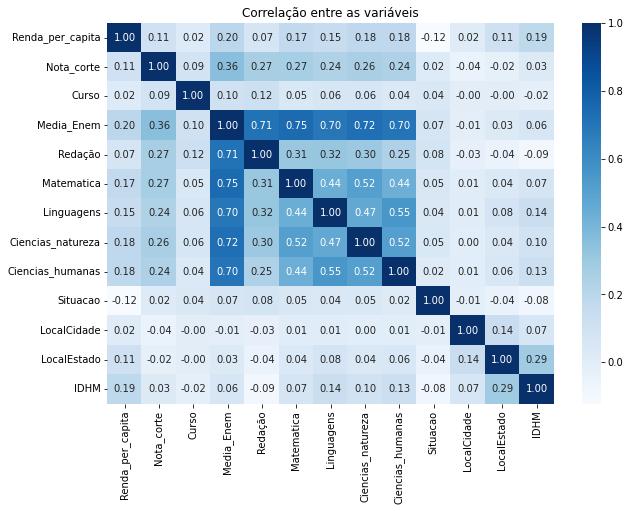

In [355]:
# Análise correlação

plt.figure(figsize=(10, 7))
sns.heatmap(df_dados.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre as variáveis')
plt.show()

In [356]:
# Verificando balanceamento da coluna alvo

balance = df_dados['Situacao'].value_counts(normalize=True).round(2)
balance.index = balance.index.map({0:'NÃO CONTRATADO', 1:'CONTRATADA'})
balance * 100

NÃO CONTRATADO    84.0
CONTRATADA        16.0
Name: Situacao, dtype: float64

In [357]:
# Total não efetivados
df_maior = df_dados[df_dados['Situacao'] == 0] 
print('linhas:', df_maior.shape[0])

linhas: 110925


In [358]:
# Total efetivados
df_menor = df_dados[df_dados['Situacao'] == 1] 
print('linhas:', df_menor.shape[0])

linhas: 21604


In [359]:
# Igualando quantidade de registros SIM/NÃO
df_unsampled = resample(df_maior, replace = True, n_samples=21603, random_state=123)

In [360]:
# Concatenando registros SIM/NÃO
df_dados = pd.concat([df_unsampled, df_menor])
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43207 entries, 41337 to 237924
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Renda_per_capita   43207 non-null  float64
 1   Nota_corte         43207 non-null  float64
 2   Curso              43207 non-null  int64  
 3   Media_Enem         43207 non-null  float64
 4   Redação            43207 non-null  int64  
 5   Matematica         43207 non-null  float64
 6   Linguagens         43207 non-null  float64
 7   Ciencias_natureza  43207 non-null  float64
 8   Ciencias_humanas   43207 non-null  float64
 9   Situacao           43207 non-null  int64  
 10  LocalCidade        43207 non-null  int64  
 11  LocalEstado        43207 non-null  int64  
 12  IDHM               43207 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 4.6 MB


In [361]:
# Análise balanceamento

import plotly.express as px
plot_ = df_dados['Situacao'].map({1:'CONTRATADA', 0:'NÃO CONTRATADO'}).value_counts().reset_index()
fig = px.bar(plot_, 
        x='index', 
        y='Situacao',
        labels={'index':'Alvo', 'Situacao':''},
        title='Balanceamente do Alvo',
        width=600)
fig.update_xaxes(type='category')
fig.show()

In [362]:
# Separação dos Dados - Dataframe
Var_Caracteristicas = df_dados.drop(columns='Situacao')
Var_Previsao = df_dados['Situacao']

# Separação dos Dados - Treino/Teste
x_treino, x_teste, y_treino, y_teste = train_test_split(Var_Caracteristicas, Var_Previsao,test_size=0.20, random_state=10)

print(f'Dados de treino: {len(x_treino)} ')
print(f'Dados de teste: {len(x_teste)} ')

Dados de treino: 34565 
Dados de teste: 8642 


Regressão Logística

In [372]:
# Criação do modelo

logistic_regression = LogisticRegression(random_state= 42, max_iter=10000)
logistic_regression.fit(x_treino, y_treino)

# Classificação
Train_predict = logistic_regression.predict(x_teste)
print(classification_report(y_teste, Train_predict))

# Acurácia
resultado = logistic_regression.score(x_teste, y_teste)
print('Acurácia:', resultado)

              precision    recall  f1-score   support

           0       0.60      0.54      0.57      4294
           1       0.59      0.64      0.61      4348

    accuracy                           0.59      8642
   macro avg       0.59      0.59      0.59      8642
weighted avg       0.59      0.59      0.59      8642

Acurácia: 0.5930340199028002


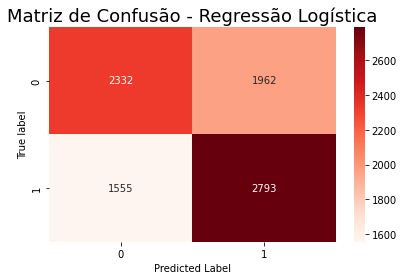

In [373]:
# Matriz de Confusão - Regressão Logística

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_teste, Train_predict), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão - Regressão Logística", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

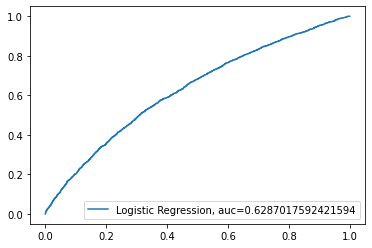

In [374]:
# Curva ROC - Regressão Logística

y_pred_probability = logistic_regression.predict_proba(x_teste)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_teste,  y_pred_probability)
auc = metrics.roc_auc_score(y_teste, y_pred_probability)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Árvore de decisão

In [375]:
# Criação do modelo

tree = DecisionTreeClassifier()
tree.fit(x_treino, y_treino)

# Classificação
Train_predict = tree.predict(x_teste)
print(classification_report(y_teste, Train_predict ))

# Acurácia
resultado = tree.score(x_teste, y_teste)
print('Acurácia:', resultado)

              precision    recall  f1-score   support

           0       0.62      0.67      0.64      4294
           1       0.65      0.59      0.62      4348

    accuracy                           0.63      8642
   macro avg       0.63      0.63      0.63      8642
weighted avg       0.63      0.63      0.63      8642

Acurácia: 0.6308724832214765


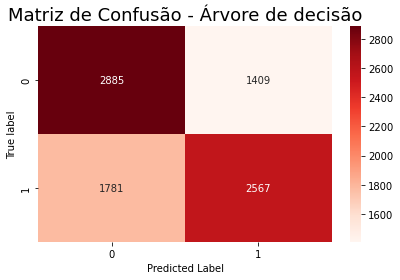

In [377]:
# Matriz de Confusão - Árvore de decisão

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_teste, Train_predict), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão - Árvore de decisão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

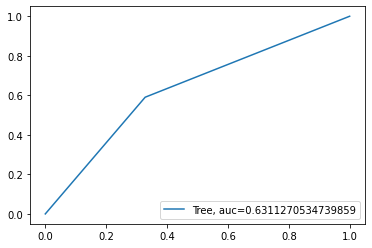

In [378]:
# Curva ROC - Árvore de decisão

y_pred_probability = tree.predict_proba(x_teste)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_teste,  y_pred_probability)
auc = metrics.roc_auc_score(y_teste, y_pred_probability)
plt.plot(fpr,tpr,label="Tree, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Random Forest

In [379]:
# Criação do modelo

random_forest = RandomForestClassifier(random_state= 42)
random_forest.fit(x_treino, y_treino)

# Classificação
Train_predict = random_forest.predict(x_teste)
print(classification_report(y_teste, Train_predict))

# Acurácia
resultado = random_forest.score(x_teste, y_teste)
print('Acurácia:', resultado)

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      4294
           1       0.70      0.68      0.69      4348

    accuracy                           0.69      8642
   macro avg       0.69      0.69      0.69      8642
weighted avg       0.69      0.69      0.69      8642

Acurácia: 0.6912751677852349


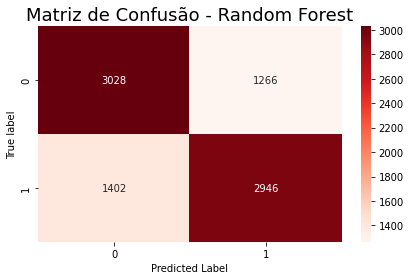

In [381]:
# Matriz de Confusão - Random Forest

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_teste, Train_predict), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão - Random Forest", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

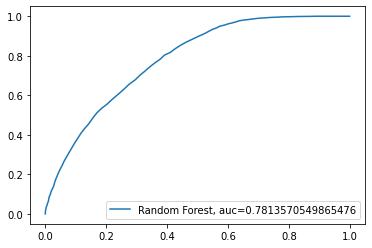

In [382]:
# Curva ROC - Random Forest

y_pred_probability = random_forest.predict_proba(x_teste)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_teste,  y_pred_probability)
auc = metrics.roc_auc_score(y_teste, y_pred_probability)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))
plt.legend(loc=4)
plt.show()